In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import scipy.constants as const
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)
from matplotlib.colors import LogNorm
from scipy import interpolate
from tqdm import notebook

In [2]:
SMALL_SIZE = 18
MEDIUM_SIZE = 20
BIGGER_SIZE = 24

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=16)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title
ml = MultipleLocator(2)

In [3]:
nx = 360
ny = 50 
nz = 200

In [4]:
## Read txt file using numpy
data = np.loadtxt("nGamma.txt", skiprows=3, usecols=(0, 1, 2, 3), delimiter=',')

In [5]:
data.shape

(3600000, 4)

In [6]:
new_data = data.reshape(nx, ny, nz, 4)

In [7]:
new_data[200, 25, 100, 3]

3053.0

# Top View Projection

In [8]:
## Top View
projection2D = np.zeros((nz, nx))
#
for ix in notebook.tqdm(range(0, nx)):
    for iz in range(0, nz):
        for iy in range(0, ny):
            projection2D[iz, ix] = projection2D[iz, ix] + new_data[ix, iy, iz, 3]

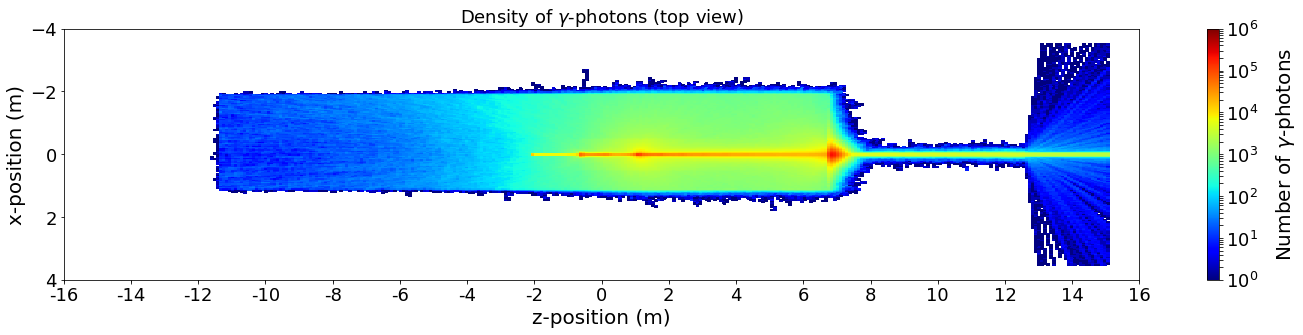

In [9]:
x = np.linspace(-16, 16, nx)
z = np.linspace(-4, 4, nz)
XX, ZZ = np.meshgrid(x, z)
#
fig, axes1 = plt.subplots(1, 1, figsize=(20, 5))
axes = iter(np.ravel(axes1))
#
ax = next(axes)
#im = plt.imshow(projection2D, norm=LogNorm(1, 1e5))
im = ax.pcolormesh(XX, ZZ, projection2D, cmap=cm.jet, norm=LogNorm(1, 1e6))
ax.set_xlabel("z-position (m)")
ax.set_ylabel("x-position (m)")
ax.set_title(r"Density of $\gamma$-photons (top view)")
ax.set_ylim(ax.get_ylim()[::-1])
cbar = plt.colorbar(im)
#
cbar.ax.get_yaxis().labelpad = 15
cbar.ax.set_ylabel(r'Number of $\gamma$-photons')
#
ax.xaxis.set_major_locator(MultipleLocator(2))
ax.xaxis.set_major_formatter(FormatStrFormatter('%d'))
ax.xaxis.set_minor_locator(MultipleLocator(2))
#
fig.tight_layout()
#plt.savefig('projection2D_pcolormesh_electrons.png', dpi=500)

## Interpolation Top View

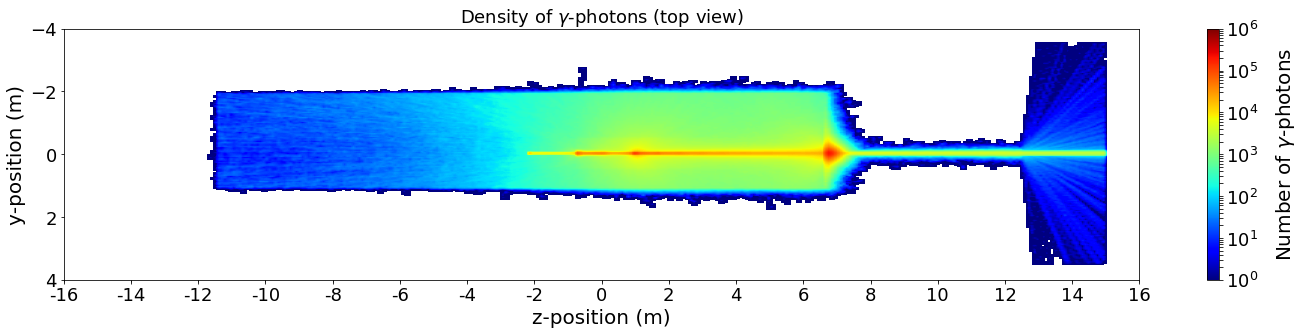

In [10]:
## Interpolate
x_array = np.arange(0, nx, 1)
z_array = np.arange(0, nz, 1)
f = interpolate.interp2d(x_array, z_array, projection2D, kind='linear')
#
x_new = np.arange(0, nx, 0.1)
y_new = np.arange(0, nz, 0.1)
znew = f(x_new, y_new)
#
x = np.linspace(-16, 16, len(x_new))
z = np.linspace(-4, 4, len(y_new))
XX, ZZ = np.meshgrid(x, z)
#
fig, axes1 = plt.subplots(1, 1, figsize=(20, 5))
axes = iter(np.ravel(axes1))
#
ax = next(axes)
#im = plt.imshow(projection2D, norm=LogNorm(1, 1e5))
im = ax.pcolormesh(XX, ZZ, znew, cmap=cm.jet, norm=LogNorm(1, 1e6))
ax.set_xlabel("z-position (m)")
ax.set_ylabel("y-position (m)")
ax.set_title(r"Density of $\gamma$-photons (top view)")
ax.set_ylim(ax.get_ylim()[::-1])
cbar = plt.colorbar(im)
#
cbar.ax.get_yaxis().labelpad = 15
cbar.ax.set_ylabel(r'Number of $\gamma$-photons')
#
ax.xaxis.set_major_locator(MultipleLocator(2))
ax.xaxis.set_major_formatter(FormatStrFormatter('%d'))
ax.xaxis.set_minor_locator(MultipleLocator(2))
#
fig.tight_layout()
plt.savefig('projection2D_pcolormesh_gamma_top.png', dpi=500)

# Side View Projection

In [11]:
## Top View
projection2D_side = np.zeros((ny, nx))
#
for ix in notebook.tqdm(range(0, nx)):
    for iy in range(0, ny):
        for iz in range(0, nz):
            projection2D_side[iy, ix] = projection2D_side[iy, ix] + new_data[ix, iy, iz, 3]

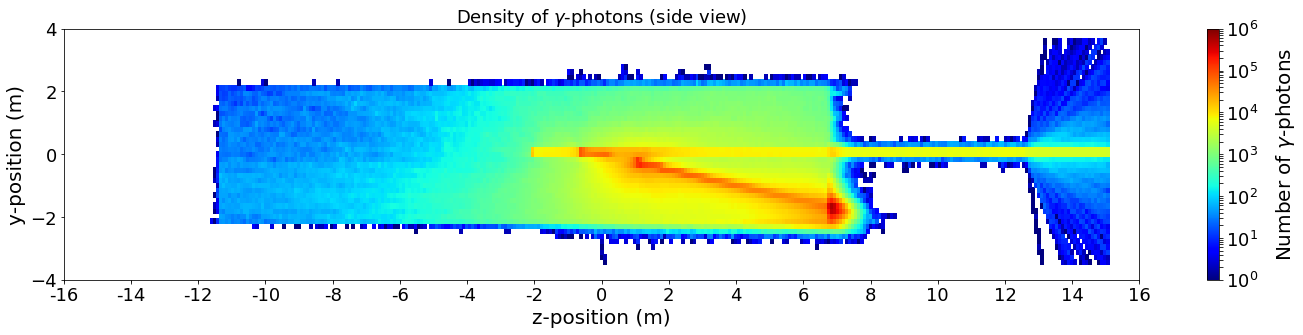

In [12]:
x = np.linspace(-16, 16, nx)
z = np.linspace(-4, 4, ny)
XX, ZZ = np.meshgrid(x, z)
#
fig, axes1 = plt.subplots(1, 1, figsize=(20, 5))
axes = iter(np.ravel(axes1))
#
ax = next(axes)
#im = plt.imshow(projection2D, norm=LogNorm(1, 1e5))
im = ax.pcolormesh(XX, ZZ, projection2D_side, cmap=cm.jet, norm=LogNorm(1, 1e6))
ax.set_xlabel("z-position (m)")
ax.set_ylabel("y-position (m)")
ax.set_title(r"Density of $\gamma$-photons (side view)")
cbar = plt.colorbar(im)
#
cbar.ax.get_yaxis().labelpad = 15
cbar.ax.set_ylabel(r'Number of $\gamma$-photons')
#
ax.xaxis.set_major_locator(MultipleLocator(2))
ax.xaxis.set_major_formatter(FormatStrFormatter('%d'))
ax.xaxis.set_minor_locator(MultipleLocator(2))
#
fig.tight_layout()
plt.savefig('projection2D_pcolormesh_gamma_side.png', dpi=500)

# Interpolation Side View

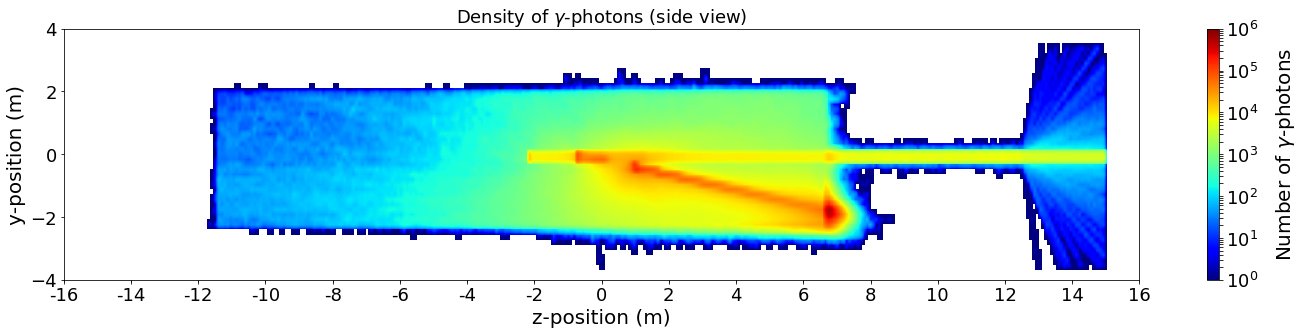

In [13]:
## Interpolate
x_array = np.arange(0, nx, 1)
y_array = np.arange(0, ny, 1)
f = interpolate.interp2d(x_array, y_array, projection2D_side, kind='linear')
#
x_new = np.arange(0, nx, 0.1)
y_new = np.arange(0, ny, 0.1)
znew = f(x_new, y_new)
#
x = np.linspace(-16, 16, len(x_new))
z = np.linspace(-4, 4, len(y_new))
XX, ZZ = np.meshgrid(x, z)
#
fig, axes1 = plt.subplots(1, 1, figsize=(20, 5))
axes = iter(np.ravel(axes1))
#
ax = next(axes)
#im = plt.imshow(projection2D, norm=LogNorm(1, 1e5))
im = ax.pcolormesh(XX, ZZ, znew, cmap=cm.jet, norm=LogNorm(1, 1e6))
ax.set_xlabel("z-position (m)")
ax.set_ylabel("y-position (m)")
ax.set_title(r"Density of $\gamma$-photons (side view)")
cbar = plt.colorbar(im)
#
cbar.ax.get_yaxis().labelpad = 15
cbar.ax.set_ylabel(r'Number of $\gamma$-photons')
#
ax.xaxis.set_major_locator(MultipleLocator(2))
ax.xaxis.set_major_formatter(FormatStrFormatter('%d'))
ax.xaxis.set_minor_locator(MultipleLocator(2))
#
fig.tight_layout()
plt.savefig('projection2D_pcolormesh_gamma_side.png', dpi=500)